In [177]:
import numpy as np
from sympy import Matrix, diag
import networkx as nx

In [164]:
a = np.array([
    [1,0.9,0,0,0],
    [0,0,0.5,0,0],
    [0,0,0,1,0],
    [0,0.1,0,0,0],
    [0,0,0.5,0,1]
])

{(0, 0): Text(0.6265883003098937, -0.16135662688421995, '1.0'),
 (0, 1): Text(0.3442584308939281, -0.19994512430620592, '0.9'),
 (1, 2): Text(-0.1480162711968922, -0.034257250825218855, '0.5'),
 (2, 3): Text(-0.4350954486326284, 0.5850095600388772, '1.0'),
 (3, 1): Text(-0.2251506159577737, 0.38073318913590404, '0.1'),
 (4, 2): Text(-0.08814353419717327, -0.3000548756937938, '0.5'),
 (4, 4): Text(0.18167403547740035, -0.7701288714653418, '1.0')}

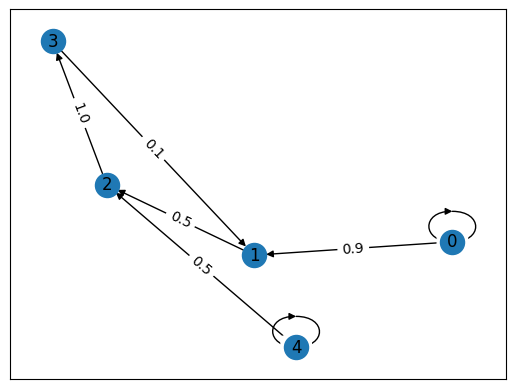

In [165]:
G = nx.from_numpy_matrix(a, create_using=nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


See http://www.columbia.edu/~ks20/stochastic-I/stochastic-I-MCII.pdf
- Individual node communicates with Company nodes, but not the other way around. i.e. if you start at a Company node, you cannot reach an Individual node.
- 

In [166]:
m = Matrix(a)

In [167]:
m

Matrix([
[1.0, 0.9,   0,   0,   0],
[  0,   0, 0.5,   0,   0],
[  0,   0,   0, 1.0,   0],
[  0, 0.1,   0,   0,   0],
[  0,   0, 0.5,   0, 1.0]])

In [168]:
m.pow(999)

Matrix([
[1.0,     0.947368421052632,     0.473684210526316,     0.473684210526316,   0],
[  0, 5.71493695641156e-434,                     0,                     0,   0],
[  0,                     0, 5.71493695641156e-434,                     0,   0],
[  0,                     0,                     0, 5.71493695641156e-434,   0],
[  0,    0.0526315789473684,     0.526315789473684,     0.526315789473684, 1.0]])

In [169]:

a_I = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]], dtype=np.complex_)
M_eigen = Matrix()
for idx, tup in enumerate(m.eigenvects()):
    a_I[idx][idx] = tup[0]
    M_eigen = M_eigen.col_insert(idx,tup[2][0])

In [170]:
(M_eigen**-1)*M_eigen

Matrix([
[1.0, -0.374610672744425 - 0.418546931985359*I + (0.309218564465121 - 0.471651849434125*I)*(0.341864041585816 + 0.105456135152399*I) + (-0.250458320986949 + 0.200366656789559*I)*(-0.0717022802535135 + 0.218461358936451*I) + (-0.207437412040808 - 0.0117760831038178*I)*(0.341864041585817 + 0.1054561351524*I) + (0.344531800573625 + 0.68351350558685*I)*(0.934186404158582 + 0.0105456135152401*I), -0.482977360398672 - 0.432277625453009*I + (-0.0135888740274323 - 0.239369987112714*I)*(0.341864041585817 + 0.1054561351524*I) + (-0.544257161762719 + 0.356819163249427*I)*(0.341864041585816 + 0.105456135152399*I) + (-0.250458320986949 + 0.200366656789559*I)*(0.252090942317372 - 0.0827400117046352*I) + (0.788732453871452 + 0.39756846102093*I)*(0.934186404158582 + 0.0105456135152401*I), 1.0 + (-0.517071708965096 - 2.31634260184274e-65*I)*(0.341864041585816 + 0.105456135152399*I) + (-0.190490846288323 - 5.71980088929898e-65*I)*(0.341864041585817 + 0.1054561351524*I) + (-0.701774277928846 + 1

In [171]:
P,D=m.diagonalize()

In [172]:
P

Matrix([
[1.0,  -0.374610672744425 - 0.418546931985359*I,  -0.482977360398672 - 0.432277625453009*I,                1.0 - 2.95975434417011e-64*I,        -0.192253709816025 + 0.15380296785282*I],
[  0,    0.344531800573625 + 0.68351350558685*I,    0.788732453871452 + 0.39756846102093*I, -0.701774277928846 + 1.60513727009075e-64*I, -2.83912369938624e-66 - 2.98440787465018e-65*I],
[  0,   0.309218564465121 - 0.471651849434125*I,  -0.544257161762719 + 0.356819163249427*I, -0.517071708965096 - 2.31634260184274e-65*I,  6.71427105341904e-65 + 1.82250008229534e-66*I],
[  0, -0.207437412040808 - 0.0117760831038178*I, -0.0135888740274323 - 0.239369987112714*I, -0.190490846288323 - 5.71980088929898e-65*I, -1.58529194858708e-64 + 2.04866963165139e-65*I],
[  0, -0.0717022802535135 + 0.218461358936451*I,  0.252090942317372 - 0.0827400117046352*I,  0.409336833182265 + 1.11558130457225e-65*I,    -0.767607596579085 - 8.59397625079132e-67*I]])

In [173]:
P.inverse() == P**-1

True

In [175]:
D.pow(10)

Matrix([
[1.0,                                              0,                                              0,                   0,   0],
[  0, (-0.184201574932019 - 0.319046486616463*I)**10,                                              0,                   0,   0],
[  0,                                              0, (-0.184201574932019 + 0.319046486616463*I)**10,                   0,   0],
[  0,                                              0,                                              0, 4.60503937330048e-5,   0],
[  0,                                              0,                                              0,                   0, 1.0]])

In [178]:
D_alt = diag(1,0,0,0,1)

In [183]:
0.76760756*0.0685657

0.052631549676691994

In [180]:
P*D_alt*P.inverse()

Matrix([
[1.0, 0.934186404158582 + (-0.192253709816025 + 0.15380296785282*I)*(-0.068565734864957 - 1.7770379154987e-17*I) + 0.0105456135152401*I, 0.341864041585816 + (-0.68565734864957 - 4.7387677746632e-17*I)*(-0.192253709816025 + 0.15380296785282*I) + 0.105456135152399*I, 0.341864041585817 + (-0.68565734864957 - 9.4775355493264e-17*I)*(-0.192253709816025 + 0.15380296785282*I) + 0.1054561351524*I,                           5.55111512312578e-17],
[  0,                                     (-0.068565734864957 - 1.7770379154987e-17*I)*(-2.83912369938624e-66 - 2.98440787465018e-65*I),                                    (-0.68565734864957 - 4.7387677746632e-17*I)*(-2.83912369938624e-66 - 2.98440787465018e-65*I),                                  (-0.68565734864957 - 9.4775355493264e-17*I)*(-2.83912369938624e-66 - 2.98440787465018e-65*I),  3.69866545359772e-66 + 3.88793426218093e-65*I],
[  0,                                      (-0.068565734864957 - 1.7770379154987e-17*I)*(6.71427105341904e-

In [182]:
m.pow(9999)

Matrix([
[1.0,      0.947368421052632,      0.473684210526316,      0.473684210526316,   0],
[  0, 4.64541429421968e-4337,                      0,                      0,   0],
[  0,                      0, 4.64541429421971e-4337,                      0,   0],
[  0,                      0,                      0, 4.64541429421971e-4337,   0],
[  0,     0.0526315789473684,      0.526315789473684,      0.526315789473684, 1.0]])

In [141]:
P*D.pow(1000)*P.inverse()

Matrix([
[1.0,          (-0.184201574932019 + 0.319046486616463*I)**1000*(-0.165661346434281 - 0.584364931203905*I)*(0.2068528033484 - 0.345543371655844*I) + (-0.436465049210792 - 0.12373327669544*I)*(-0.184201574932019 - 0.319046486616463*I)**1000*(0.462633672434361 - 0.276946629327117*I) + 0.947368421052632 - 1.24772378661039e-16*I, (-0.644655910493518 + 7.6551306367892e-17*I)*(2.10540077601635e-434 + 3.25262614787003e-466*I) + (-0.546515060723692 - 0.0086428369548003*I)*(-0.184201574932019 + 0.319046486616463*I)**1000*(-0.165661346434281 - 0.584364931203905*I) + (-0.436465049210792 - 0.12373327669544*I)*(-0.184201574932019 - 0.319046486616463*I)**1000*(0.0115715355253091 + 0.731706322050681*I) + 0.473684210526316 + 1.10093275289152e-17*I, (-1.74986536008563 + 1.53102612735784e-16*I)*(2.10540077601635e-434 + 3.25262614787003e-466*I) + (-0.184201574932019 + 0.319046486616463*I)**1000*(-0.165661346434281 - 0.584364931203905*I)*(0.721417865445251 + 1.296452934214*I) + (-1.73576700146082

In [142]:
I = Matrix(a_I)

In [143]:
I.pow(100)

Matrix([
[1.0,                                               0,                                               0,                    0, 0],
[  0, (-0.184201574932019 - 0.319046486616463*I)**100,                                               0,                    0, 0],
[  0,                                               0, (-0.184201574932019 + 0.319046486616463*I)**100,                    0, 0],
[  0,                                               0,                                               0, 4.28877712534785e-44, 0],
[  0,                                               0,                                               0,                    0, 0]])

In [144]:
m.pow(999).T

Matrix([
[              1.0,                     0,                     0,                     0,                     0],
[0.947368421052632, 5.71493695641156e-434,                     0,                     0, 5.71493695641156e-434],
[0.473684210526316,                     0, 5.71493695641156e-434,                     0,                     0],
[0.473684210526316,                     0,                     0, 5.71493695641156e-434,                     0],
[                0,                     0,                     0,                     0,                     0]])

In [145]:
m.jordan_form()

[Matrix([
 [  0, 1.0, -1.42495960802569, -0.708572827566102 + 0.190903031994224*I, -0.708572827566102 - 0.190903031994224*I],
 [  0,   0,               1.0,                                      1.0,                                      1.0],
 [  0,   0, 0.736806299728077, -0.368403149864039 - 0.638092973232926*I, -0.368403149864039 + 0.638092973232926*I],
 [  0,   0, 0.271441761659491,  -0.135720880829745 + 0.23507546124512*I,  -0.135720880829745 - 0.23507546124512*I],
 [1.0,   0,               1.0,                                      1.0,                                      1.0]]),
 Matrix([
 [0,   0,                 0,                                        0,                                        0],
 [0, 1.0,                 0,                                        0,                                        0],
 [0,   0, 0.368403149864039,                                        0,                                        0],
 [0,   0,                 0, -0.184201574932019 - 0.3190

In [146]:
sym_eignvects = []
for tup in m.eigenvects():
    for v in tup[2]:
        sym_eignvects.append(list(v))
for eigenvect in m.T.eigenvects():
    print(eigenvect)
    print("===")
# print(m.eigenvals())

(1.0 - 1.34273262654885e-64*I, 1, [Matrix([
[  0.1702546340033 + 0.630256704116095*I],
[  0.1612938637926 + 0.597085298636301*I],
[0.0806469318962998 + 0.29854264931815*I],
[0.0806469318962998 + 0.29854264931815*I],
[                                      0]])])
===
(-0.184201574932019 + 0.319046486616463*I, 1, [Matrix([
[1.18675053302481e-64 - 1.91437029821837e-65*I],
[    -0.245899788903458 + 0.0450979672761452*I],
[      0.219875807022415 + 0.258421352271043*I],
[      0.309067803784697 - 0.867605803078769*I],
[                                            0]])])
===
(-0.184201574932019 - 0.319046486616463*I, 1, [Matrix([
[-9.46021265496673e-65 - 8.20673357147134e-65*I],
[       0.305744875871099 + 0.145894046255445*I],
[      -0.378960370394112 + 0.260361246265629*I],
[      -0.0977170478679153 - 1.24420741541119*I],
[                                             0]])])
===
(0.368403149864039 - 2.89853367528301e-96*I, 1, [Matrix([
[5.30731239763526e-64 + 1.75358769008484e-64*I],
[   0.

In [147]:
a_alt = np.array([
    [1,0],
    [2,0]
])
m_alt = Matrix(a_alt)
sym_eignvects = []
for tup in m_alt.eigenvects():
    for v in tup[2]:
        sym_eignvects.append(list(v))
sym_eignvects
print(m_alt.eigenvects())
print(m_alt.eigenvals())

[(0, 1, [Matrix([
[0],
[1]])]), (1, 1, [Matrix([
[1/2],
[  1]])])]
{1: 1, 0: 1}


In [148]:
m.eigenvects()[0][2][0]

Matrix([
[1.0],
[  0],
[  0],
[  0],
[  0]])

In [149]:
m.eigenvects()

[(1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0],
   [  0],
   [  0],
   [  0]])]),
 (-0.184201574932019 - 0.319046486616463*I,
  1,
  [Matrix([
   [  -0.436465049210792 - 0.12373327669544*I],
   [  0.530428812745532 + 0.317530868462027*I],
   [0.00720257055607156 - 0.455442270333682*I],
   [-0.146633981046574 + 0.0815952286555569*I],
   [  0.530428812745532 + 0.317530868462027*I]])]),
 (-0.184201574932019 + 0.319046486616463*I,
  1,
  [Matrix([
   [  -0.165661346434281 - 0.584364931203905*I],
   [   0.425128895061457 + 0.710169112576328*I],
   [-0.609772744580877 + 0.00964322264772525*I],
   [      0.109244463597 - 0.196322148592138*I],
   [   0.425128895061457 + 0.710169112576328*I]])]),
 (0.368403149864039,
  1,
  [Matrix([
   [               1.0 + 1.54489643250933e-32*I],
   [-0.701774277928846 - 1.48288954470687e-32*I],
   [-0.517071708965096 - 6.40851845289361e-33*I],
   [-0.190490846288323 + 4.91232088401309e-33*I],
   [-0.701774277928846 - 1.48288954470687e-32*I]])]),
 (

In [150]:
m.T.eigenvects()

[(1.0 - 1.34273262654885e-64*I,
  1,
  [Matrix([
   [  0.1702546340033 + 0.630256704116095*I],
   [  0.1612938637926 + 0.597085298636301*I],
   [0.0806469318962998 + 0.29854264931815*I],
   [0.0806469318962998 + 0.29854264931815*I],
   [                                      0]])]),
 (-0.184201574932019 + 0.319046486616463*I,
  1,
  [Matrix([
   [1.18675053302481e-64 - 1.91437029821837e-65*I],
   [    -0.245899788903458 + 0.0450979672761452*I],
   [      0.219875807022415 + 0.258421352271043*I],
   [      0.309067803784697 - 0.867605803078769*I],
   [                                            0]])]),
 (-0.184201574932019 - 0.319046486616463*I,
  1,
  [Matrix([
   [-9.46021265496673e-65 - 8.20673357147134e-65*I],
   [       0.305744875871099 + 0.145894046255445*I],
   [      -0.378960370394112 + 0.260361246265629*I],
   [      -0.0977170478679153 - 1.24420741541119*I],
   [                                             0]])]),
 (0.368403149864039 - 2.89853367528301e-96*I,
  1,
  [Matrix([

In [151]:
m.left_eigenvects()

[(1.0 - 1.34273262654885e-64*I,
  1,
  [Matrix([[0.1702546340033 + 0.630256704116095*I, 0.1612938637926 + 0.597085298636301*I, 0.0806469318962998 + 0.29854264931815*I, 0.0806469318962998 + 0.29854264931815*I, 0]])]),
 (-0.184201574932019 + 0.319046486616463*I,
  1,
  [Matrix([[1.18675053302481e-64 - 1.91437029821837e-65*I, -0.245899788903458 + 0.0450979672761452*I, 0.219875807022415 + 0.258421352271043*I, 0.309067803784697 - 0.867605803078769*I, 0]])]),
 (-0.184201574932019 - 0.319046486616463*I,
  1,
  [Matrix([[-9.46021265496673e-65 - 8.20673357147134e-65*I, 0.305744875871099 + 0.145894046255445*I, -0.378960370394112 + 0.260361246265629*I, -0.0977170478679153 - 1.24420741541119*I, 0]])]),
 (0.368403149864039 - 2.89853367528301e-96*I,
  1,
  [Matrix([[5.30731239763526e-64 + 1.75358769008484e-64*I, 0.368425119256276 + 8.15864003876006e-33*I, 0.500029817052658 + 1.10729781243334e-32*I, 1.35728974423046 + 3.00566868888607e-32*I, 0]])]),
 (0,
  1,
  [Matrix([[-1.76647250959914e-65 - 1.791

In [152]:
m.left_eigenvects()[0][2][0]

Matrix([[0.1702546340033 + 0.630256704116095*I, 0.1612938637926 + 0.597085298636301*I, 0.0806469318962998 + 0.29854264931815*I, 0.0806469318962998 + 0.29854264931815*I, 0]])

In [153]:
m.left_eigenvects()[0][2][0]

Matrix([[0.1702546340033 + 0.630256704116095*I, 0.1612938637926 + 0.597085298636301*I, 0.0806469318962998 + 0.29854264931815*I, 0.0806469318962998 + 0.29854264931815*I, 0]])

In [154]:
m.left_eigenvects()[0][2][0]*m.pow(1)

Matrix([[0.1702546340033 + 0.630256704116095*I, 0.1612938637926 + 0.597085298636301*I, 0.0806469318962998 + 0.29854264931815*I, 0.0806469318962998 + 0.29854264931815*I, 0]])

In [155]:
m.pow(1001)

Matrix([
[1.0,     0.947368421052632,     0.473684210526316,     0.473684210526316, 0],
[  0,                     0,                     0, 2.85746847820578e-434, 0],
[  0, 5.71493695641156e-435,                     0,                     0, 0],
[  0,                     0, 2.85746847820578e-435,                     0, 0],
[  0,                     0,                     0, 2.85746847820578e-434, 0]])

In [156]:
m.pow(5)

Matrix([
[1.0, 0.945, 0.4725,  0.45, 0],
[  0,     0,      0, 0.025, 0],
[  0, 0.005,      0,     0, 0],
[  0,     0, 0.0025,     0, 0],
[  0,     0,      0, 0.025, 0]])

In [157]:
m.pow(1)

Matrix([
[1.0, 0.9,   0,   0, 0],
[  0,   0, 0.5,   0, 0],
[  0,   0,   0, 1.0, 0],
[  0, 0.1,   0,   0, 0],
[  0,   0, 0.5,   0, 0]])

In [158]:
a_test = np.array([[0.5,0.4,0.1],[0.3,0.4,0.3],[0.2,0.3,0.5]])
m_test = Matrix(a_test)

{(0, 0): Text(-1.0, -0.1973852491311977, '0.5'),
 (0, 1): Text(-0.3982798786986588, 0.31762540479713397, '0.4'),
 (0, 2): Text(-0.10172012130134128, -0.4163180293627328, '0.1'),
 (1, 0): Text(-0.3982798786986588, 0.31762540479713397, '0.3'),
 (1, 1): Text(0.2034402426026825, 0.8326360587254656, '0.4'),
 (1, 2): Text(0.5, 0.09869262456559885, '0.3'),
 (2, 0): Text(-0.10172012130134128, -0.4163180293627328, '0.2'),
 (2, 1): Text(0.5, 0.09869262456559885, '0.3'),
 (2, 2): Text(0.7965597573973174, -0.6352508095942679, '0.5')}

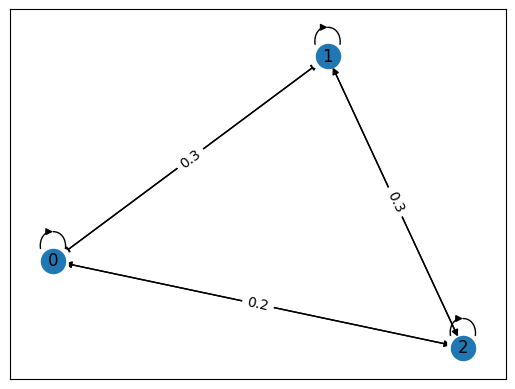

In [159]:
G = nx.from_numpy_matrix(a_test, create_using=nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


In [160]:
sum(m_test.left_eigenvects()[0][2][0])

1.72355263742428

In [161]:
m_test.left_eigenvects()[0][2][0]/sum(m_test.left_eigenvects()[0][2][0])

Matrix([[0.338709677419355, 0.370967741935484, 0.290322580645161]])

In [162]:
m_test.pow(1000)

Matrix([
[0.338709677419357, 0.370967741935486, 0.290322580645163],
[0.338709677419357, 0.370967741935486, 0.290322580645163],
[0.338709677419357, 0.370967741935486, 0.290322580645163]])